In [1]:
#Let's create a histogram in jpyter notebook.
#First, import the pandas library as 'pd', matplotlib, pyplot, and the iris dataset as an example,
#and you can follow along in jupyter notebook.
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt

iris = pd.read_csv('assets/iris.csv') #Load the iris.csv dataset

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

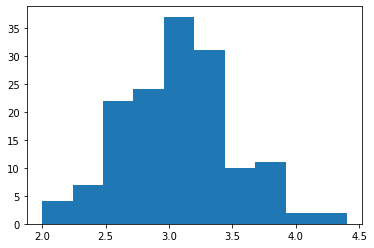

In [2]:
#We'll use the plt.hist method in matplotlib to create the same very basic histogram of sepal weidth
#we just looked at
plt.hist(iris['sepal_width'])
#This simple histogram is a great first attempt in understanding your data.
#Notice that by default, the histograms in Matplotlib use ten bins, that is ten different bars.

(array([ 1.,  0.,  3.,  4.,  3.,  8.,  5.,  9., 14., 10., 26., 11., 13.,
         6., 12.,  6.,  4.,  3.,  6.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([2.   , 2.096, 2.192, 2.288, 2.384, 2.48 , 2.576, 2.672, 2.768,
        2.864, 2.96 , 3.056, 3.152, 3.248, 3.344, 3.44 , 3.536, 3.632,
        3.728, 3.824, 3.92 , 4.016, 4.112, 4.208, 4.304, 4.4  ]),
 <BarContainer object of 25 artists>)

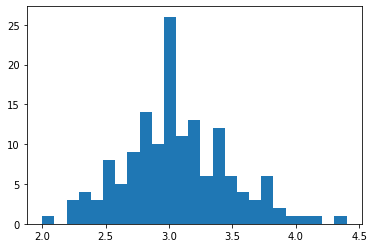

In [3]:
#Let's do the same function with the bin set to 25.
plt.hist(iris["sepal_width"], bins = 25) #Using the bins function, matplotlib will automatically
#create 25 evenly spaced bins.
#Now we see that the sampled plot looks smoother than the previous one.
#We've included an optional reading that goes into more detail on the influence of bin sizes.

Text(0, 0.5, 'Frequency')

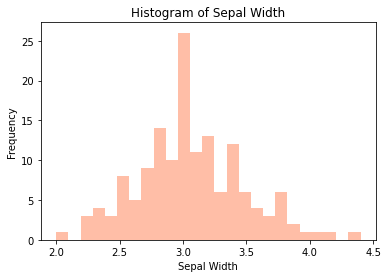

In [4]:
#The hist() function has many options to tune both the calculation and the display.
#The plt.hist docstring has more informaiton on other customization options that are available.

#Let's explore those and create a more customized histogram, that gives us more information about the axis
# We can stick with the bin size of 25, and
# Set the transparency level using the alpha at alpha=0.5
# And set histtype='stepfilled', which generates a lineplot that is by default filled.
# And change the color using color='coral'
plt.hist(iris["sepal_width"], bins=25, alpha=0.5,
        histtype="stepfilled", color='coral')

#We also need a title and axis labels
plt.title("Histogram of Sepal Width") # We can add these using the plt.title and xlabel, and ylabel.
plt.xlabel('Sepal Width')
plt.ylabel("Frequency")

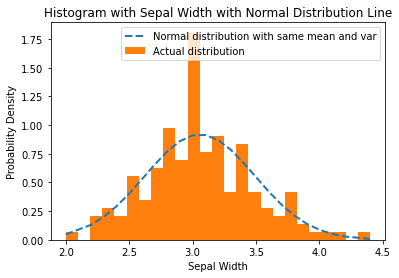

In [5]:
#the plot most often accompanined by a histogram is a normal distribution plot. These plots come in handy
#when we are trying to identify averages, outliners, and distributions. Also, they're very easy to produce with
#Python.
#First, we'll be focusing on the normal distribution using the probability density function.
#Basically, if we have a range of x's, which in this case would be the sepal width variable measures,
#a mean and a standard deviation (σσ), we can pass them onto this formula and get corresponding y values,
#which we can then plot using the standard matplotlib plot() function:

#Let's set up the scene first:

#Ok, lead in the norm function from scipy.stats,
from scipy.stats import norm

#and convert pandas DataFrame object to numpy array and sort
sw = np.asarray(iris["sepal_width"])
sw = sorted(sw)

#Let's use the scipy stats module pdf, or probability density function to fit a normal distribution
#width the same mean and standard deviation, and inside it we can use numpy to determine a mean and a STD of sepal width
fit = norm.pdf(sw, np.mean(sw), np.std(sw))

#Now, we can plot both series on the histogram
plt.plot(sw,fit,"--", linewidth = 2, label="Normal distribution with same mean and var")
plt.hist(sw,density=True,bins = 25, label="Actual distribution")

#and add our information
plt.title("Histogram with Sepal Width with Normal Distribution Line")
plt.xlabel("Sepal Width")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
#This data doesn't look very normal, as we can see that there are several points
#extending above the normal distribution line


In [6]:
#Let's check out the kurtosis. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed
#relative to a normal distribution. That is, data sets with higher kertosis tend to have heavy tails, or
#outliers. Data sets with low kertosis tend to have light tails, or lack of outliers.
#A uniform distribution would be the extreme case.

#We can use the pandas .kurt to do this
#Note, pandas uses Fisher's definition of kertosis (kertosis of normal == 0.0)
iris['sepal_width'].kurt()
#we can see that the data are indeed, not normal because the Kurtosis doesn't equal 1.
#The sign of the kurtosis indicates how the data deviate from the normal distribution
#In our case, we have a positive value of .228 which indicates that the distribution has heavier tails
#and a sharper peak than the normal distribution.

#If we had a negative value, say -.45, this would indicate our data has lighter tails and a flatter
#peak than the normal distribution

0.2282490424681929

(array([20., 23., 16., 16.,  5.,  9.,  3.,  1.,  6.,  1.]),
 array([3.86329710e-03, 3.71035950e+01, 7.42033267e+01, 1.11303058e+02,
        1.48402790e+02, 1.85502522e+02, 2.22602253e+02, 2.59701985e+02,
        2.96801717e+02, 3.33901449e+02, 3.71001180e+02]),
 <BarContainer object of 10 artists>)

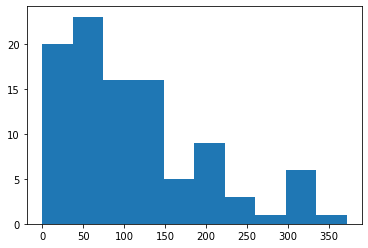

In [7]:
#To make this concrete, below is an example of a sample of Gaussian numbers transformated to have
#an expoential distribution

# First, we can generate some data
np.random.seed(42) #To ensure we get the same data every time.
X = (np.random.randn(100,1) * 5 + 10)**2

#Let's plot the histogram of the above data to see what's going on.
plt.hist(X)

#We can already see from the histogram that the data appears pretty noisy. And it's strangely skewed.
#With experience, you would notice that the data are positively skewed because the tail on the 
#right side of the distribution is longer or fatter. This is indicating some sort of power law, or exponential.

In [8]:
#let's check the kurotosis using the scipy.stats this time
from scipy.stats import kurtosis
#We will specify that we want to use Fisher's definition to be consistent.

#Kurtosis is the fourth central moment divided by the square of the variance. If Fisher's definition is used, 
#then 3.0 is subtracted from the result to give 0.0 for the normal distribution.
kurtosis(X, fisher=True)
#This data doesn't have too much of a kurtosis issue, but let's check the skewness

array([0.34387516])

In [9]:
#For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness
#value > 0 means that there is more weight in the right tail of the distrinution.

#first import the skew fuction
from scipy.stats import skew

skew(X)
#which we would like to also be 0.
#But of course, ... it is not.

array([0.96378623])

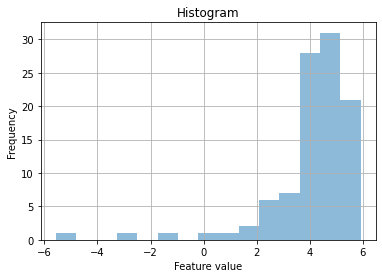

In [10]:
#We can transform the data, by trying to invert the mathematical operations that has occured up to the point where
#we measured it. This is ok, we're not altering the data, we're just changing how it is represented.
df = pd.DataFrame(X) # Create a pandas DataFrame out of the numpy array

df_exp = df.apply(np.log)  #pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins = 15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

#Ok, so that still looks a bit weird.

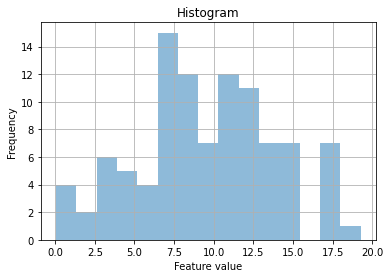

In [11]:
#I wonder if it's a power law?

df_pow = df.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

#That's looking much better! So it looks like it is a power law (to the power of 2).

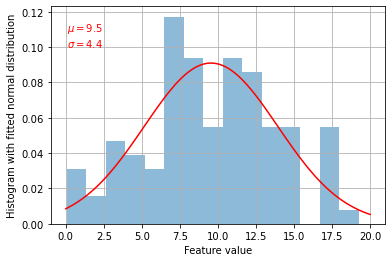

In [12]:
#But to be sure, let's fit a normal curve over the top...
import scipy.stats as stats
from scipy.stats import norm
param = stats.norm.fit(df_pow)      #Fit a normal distribution to the data

x = np.linspace(0, 20, 100)         # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(x, *param)    # Use the fitted parameters to create the y datapoints

# Plot the histogram again
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, density=True, legend=None)

# Plot some fancy text to show us what the parameters of the distribution are (mean and standard deviation)
plt.text(x=np.min(df_pow), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')

# Plot a line of the fitted distribution over the top
plt.plot(x, pdf_fitted, color='r')

#Standard plot stuff
plt.xlabel("Feature value")
plt.ylabel("Histogram with fitted normal distribution")
plt.show()